<a href="https://colab.research.google.com/github/ekacelnik/puc-dados-analytics/blob/main/MVP_MachineLearning_EK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint: Machine Learning & Analytics

## Especialização em Ciência de Dados e Analytics - PUC-Rio

Erika Kacelnik

14 de abril de 2024

Professores: Hugo Villamizar e Patrick Happ



# 1\. Introdução

Este trabalho pretende exercitar habilidades aprendidas durante a sprint de "Machine Learning & Analytics". Para isso, trabalharemos os dados do dataset "Seoul Bike Sharing Demand", disponibilizado gratuitamente no UCI Machine Learning Repository.

# 2. Objetivo

O objetivo do trabalho é construir um modelo de previsão do uso de bicicletas comunitárias em Seoul. Vamos tentar construir uma ferramenta para previsão de demanda, a fim de auxiliar a cidade na organização de quantas bicicletas devem estar disponíveis.

Faremos isso analisando os dados de uso das bicicletas comunitárias de Seoul ao longo de um ano, coletados e reunidos no dataset "Seoul Bike Sharing Demand", e usando-os para treinar o modelo.

Os dados reunem condições climáticas mensuráveis, como temperatura, humidade, vento, nível de chuva e neve, e características sobre o momento da coleta, como horário, estação do ano e se é um feriado. A nossa variável-alvo é a quantidade de bicicletas alugadas.

Temos inicialmente a hipótese de que as estações e os fatores mais perceptíveis que as definem – como temperatura, chuva e neve – terão maior impacto no nível de utilização das bicicletas. Além disso, levando em consideração a rotina mais comum, imagina-se que as bicicletas serão muito demandadas em horários de rush durante a semana.



# 3. Configurações iniciais

## 3.1 Importar bibliotecas

Primeiro vamos instalar as bibliotecas necessárias no ambiente de execução.

In [41]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

## 3.2 Carga do dataset

Agora vamos importar o dataset "Seoul Bike Sharing Demand" a partir de um link: ele está armazenado em um arquivo .csv no Github.

Armazenaremos os dados em um dataframe Pandas.

In [35]:
# Informando a URL de importação do dataset
dataset_url = "https://raw.githubusercontent.com/ekacelnik/puc-dados-analytics/main/SeoulBikeData.csv"

# Lendo o arquivo com a biblioteca Pandas
dataset = pd.read_csv(dataset_url, delimiter=',', encoding='latin1')

# Exibindo as primeiras linhas e últimas linhas do dataset
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 4. Breve análise exploratória dos dados

## 4\.1 Análise dos atributos e estatísticas iniciais

Iremos iniciar o trabalho analisando algumas características básicas do dataset e de suas variáveis.

In [36]:
# Verificando a quantidade de instâncias por variável e se existem nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [37]:
# Verificando instâncias nulas
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [38]:
# Verificando instâncias duplicadas
dataset.duplicated().sum()

0

Identificamos, portanto, que temos:
- 4 variáveis do tipo integer.
- 6 variáveis do tipo float.
- 4 variáveis do tipo object.

Nosso dataset também não tem valores nulos nem duplicados.

In [39]:
# Exibindo um sumário estatístico
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## 4\.2 Análise de gráficos

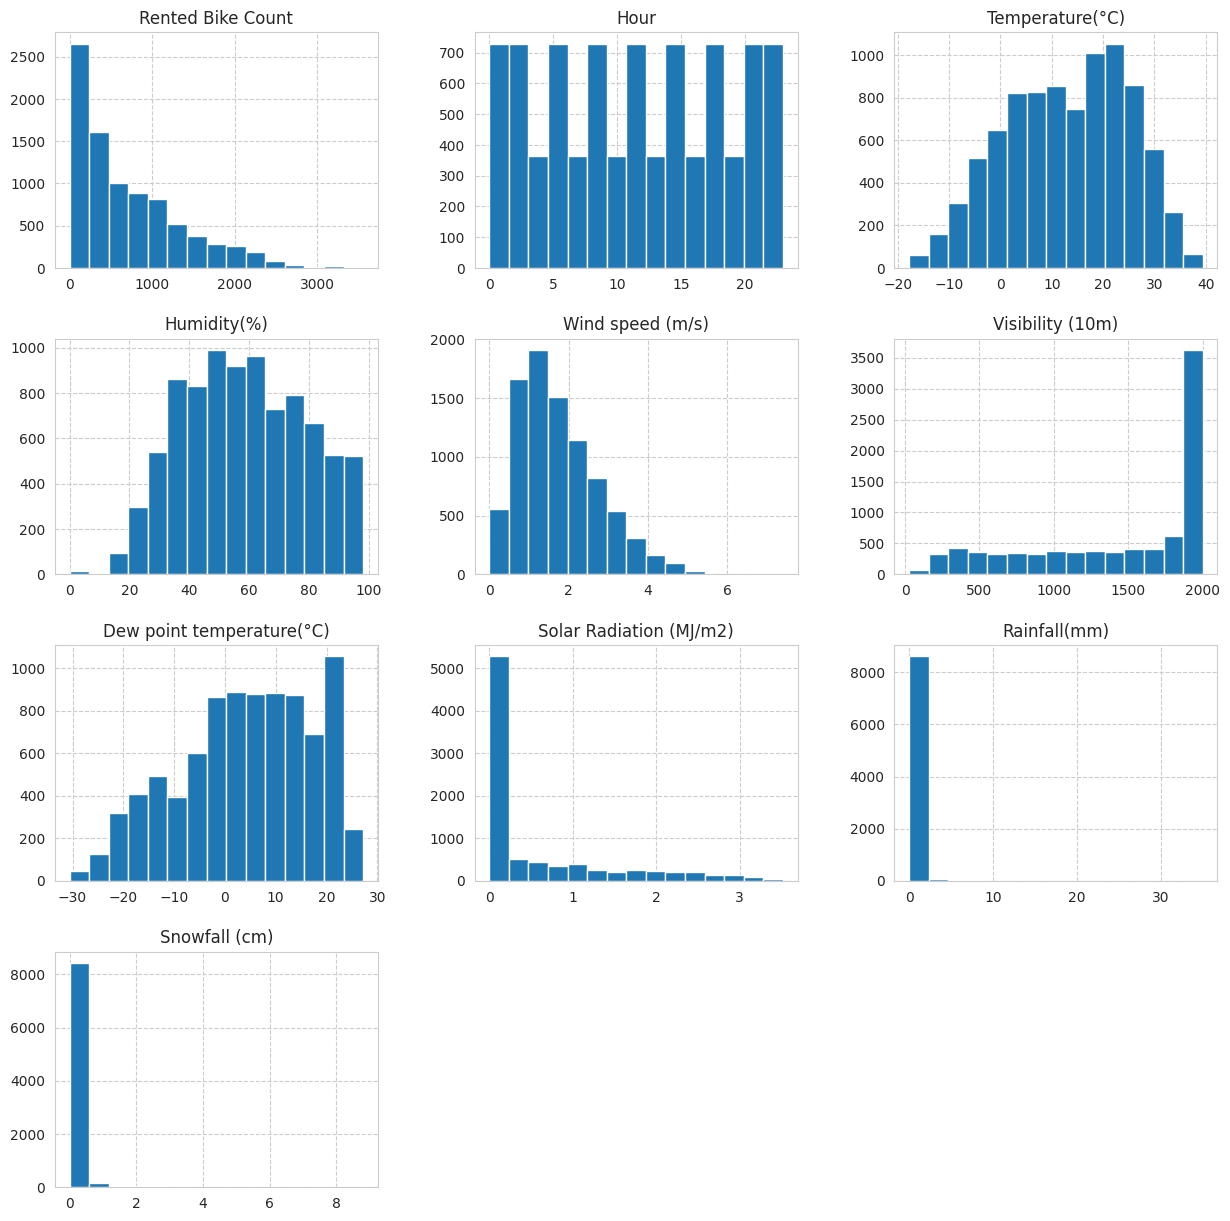

In [40]:
# Plotando histogramas com Plotly
dataset.hist(figsize = (15,15), bins=15)
plt.show()

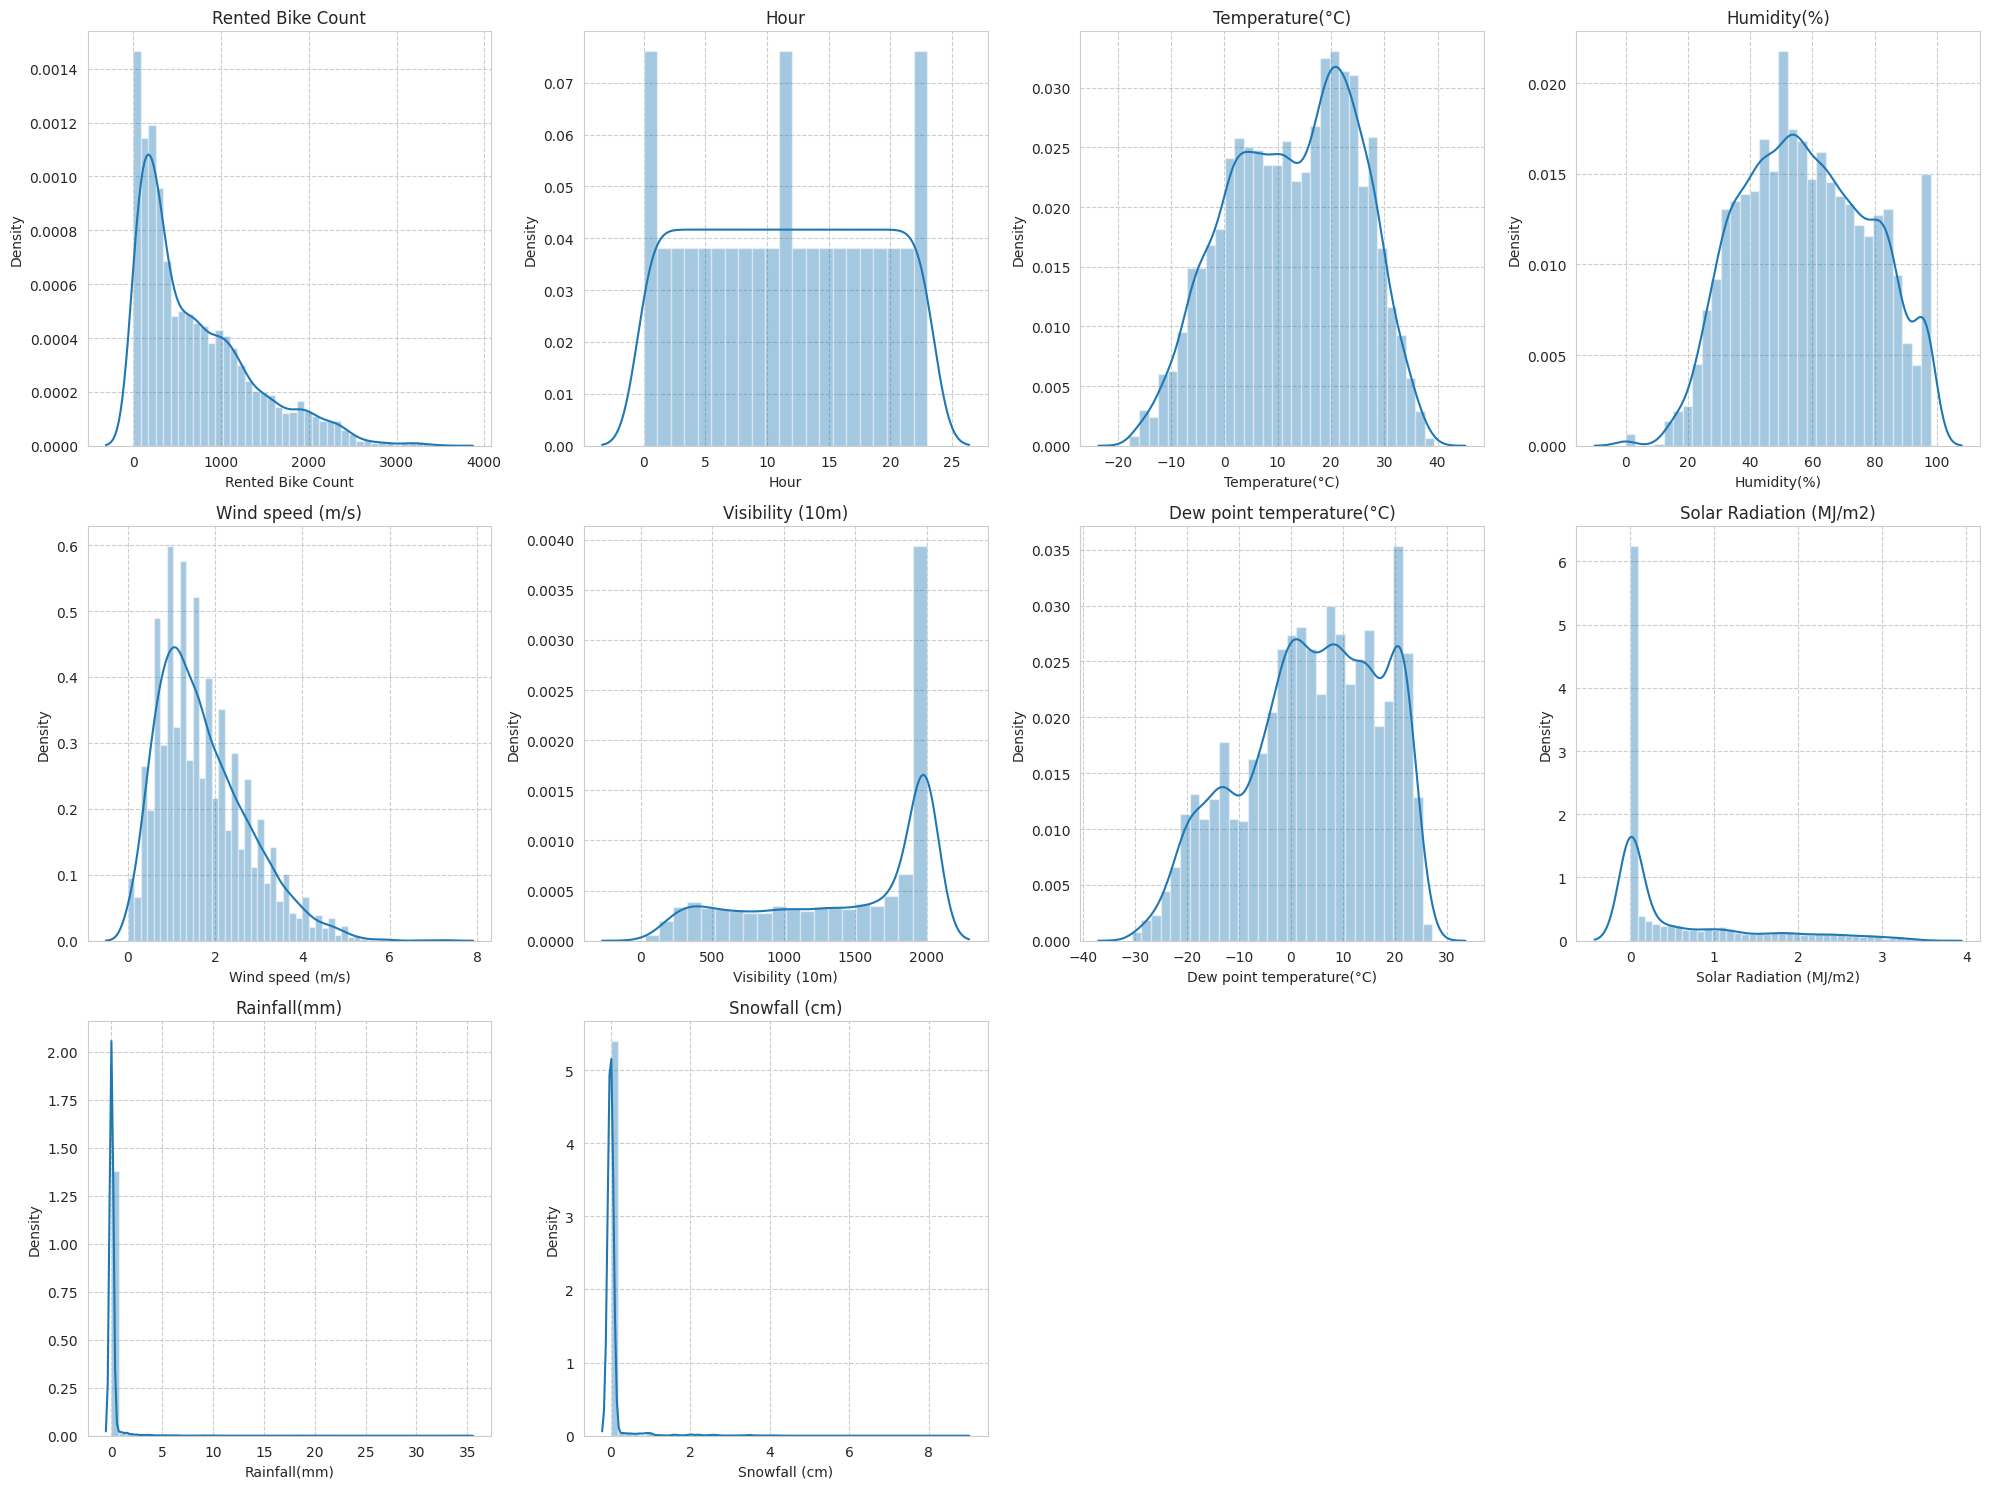

In [42]:
# Plotando histogramas com Seaborn

sns.set_style("whitegrid",{'grid.linestyle': '--'})

numeric_features = dataset.select_dtypes(exclude='object')
categorical_features = dataset.select_dtypes(include='object')

n = 1
plt.figure(figsize = (20,15))
for i in numeric_features.columns:
  plt.subplot(3, 4, n)
  n += 1
  sns.distplot(dataset[i])
  plt.title(i)
  plt.tight_layout()

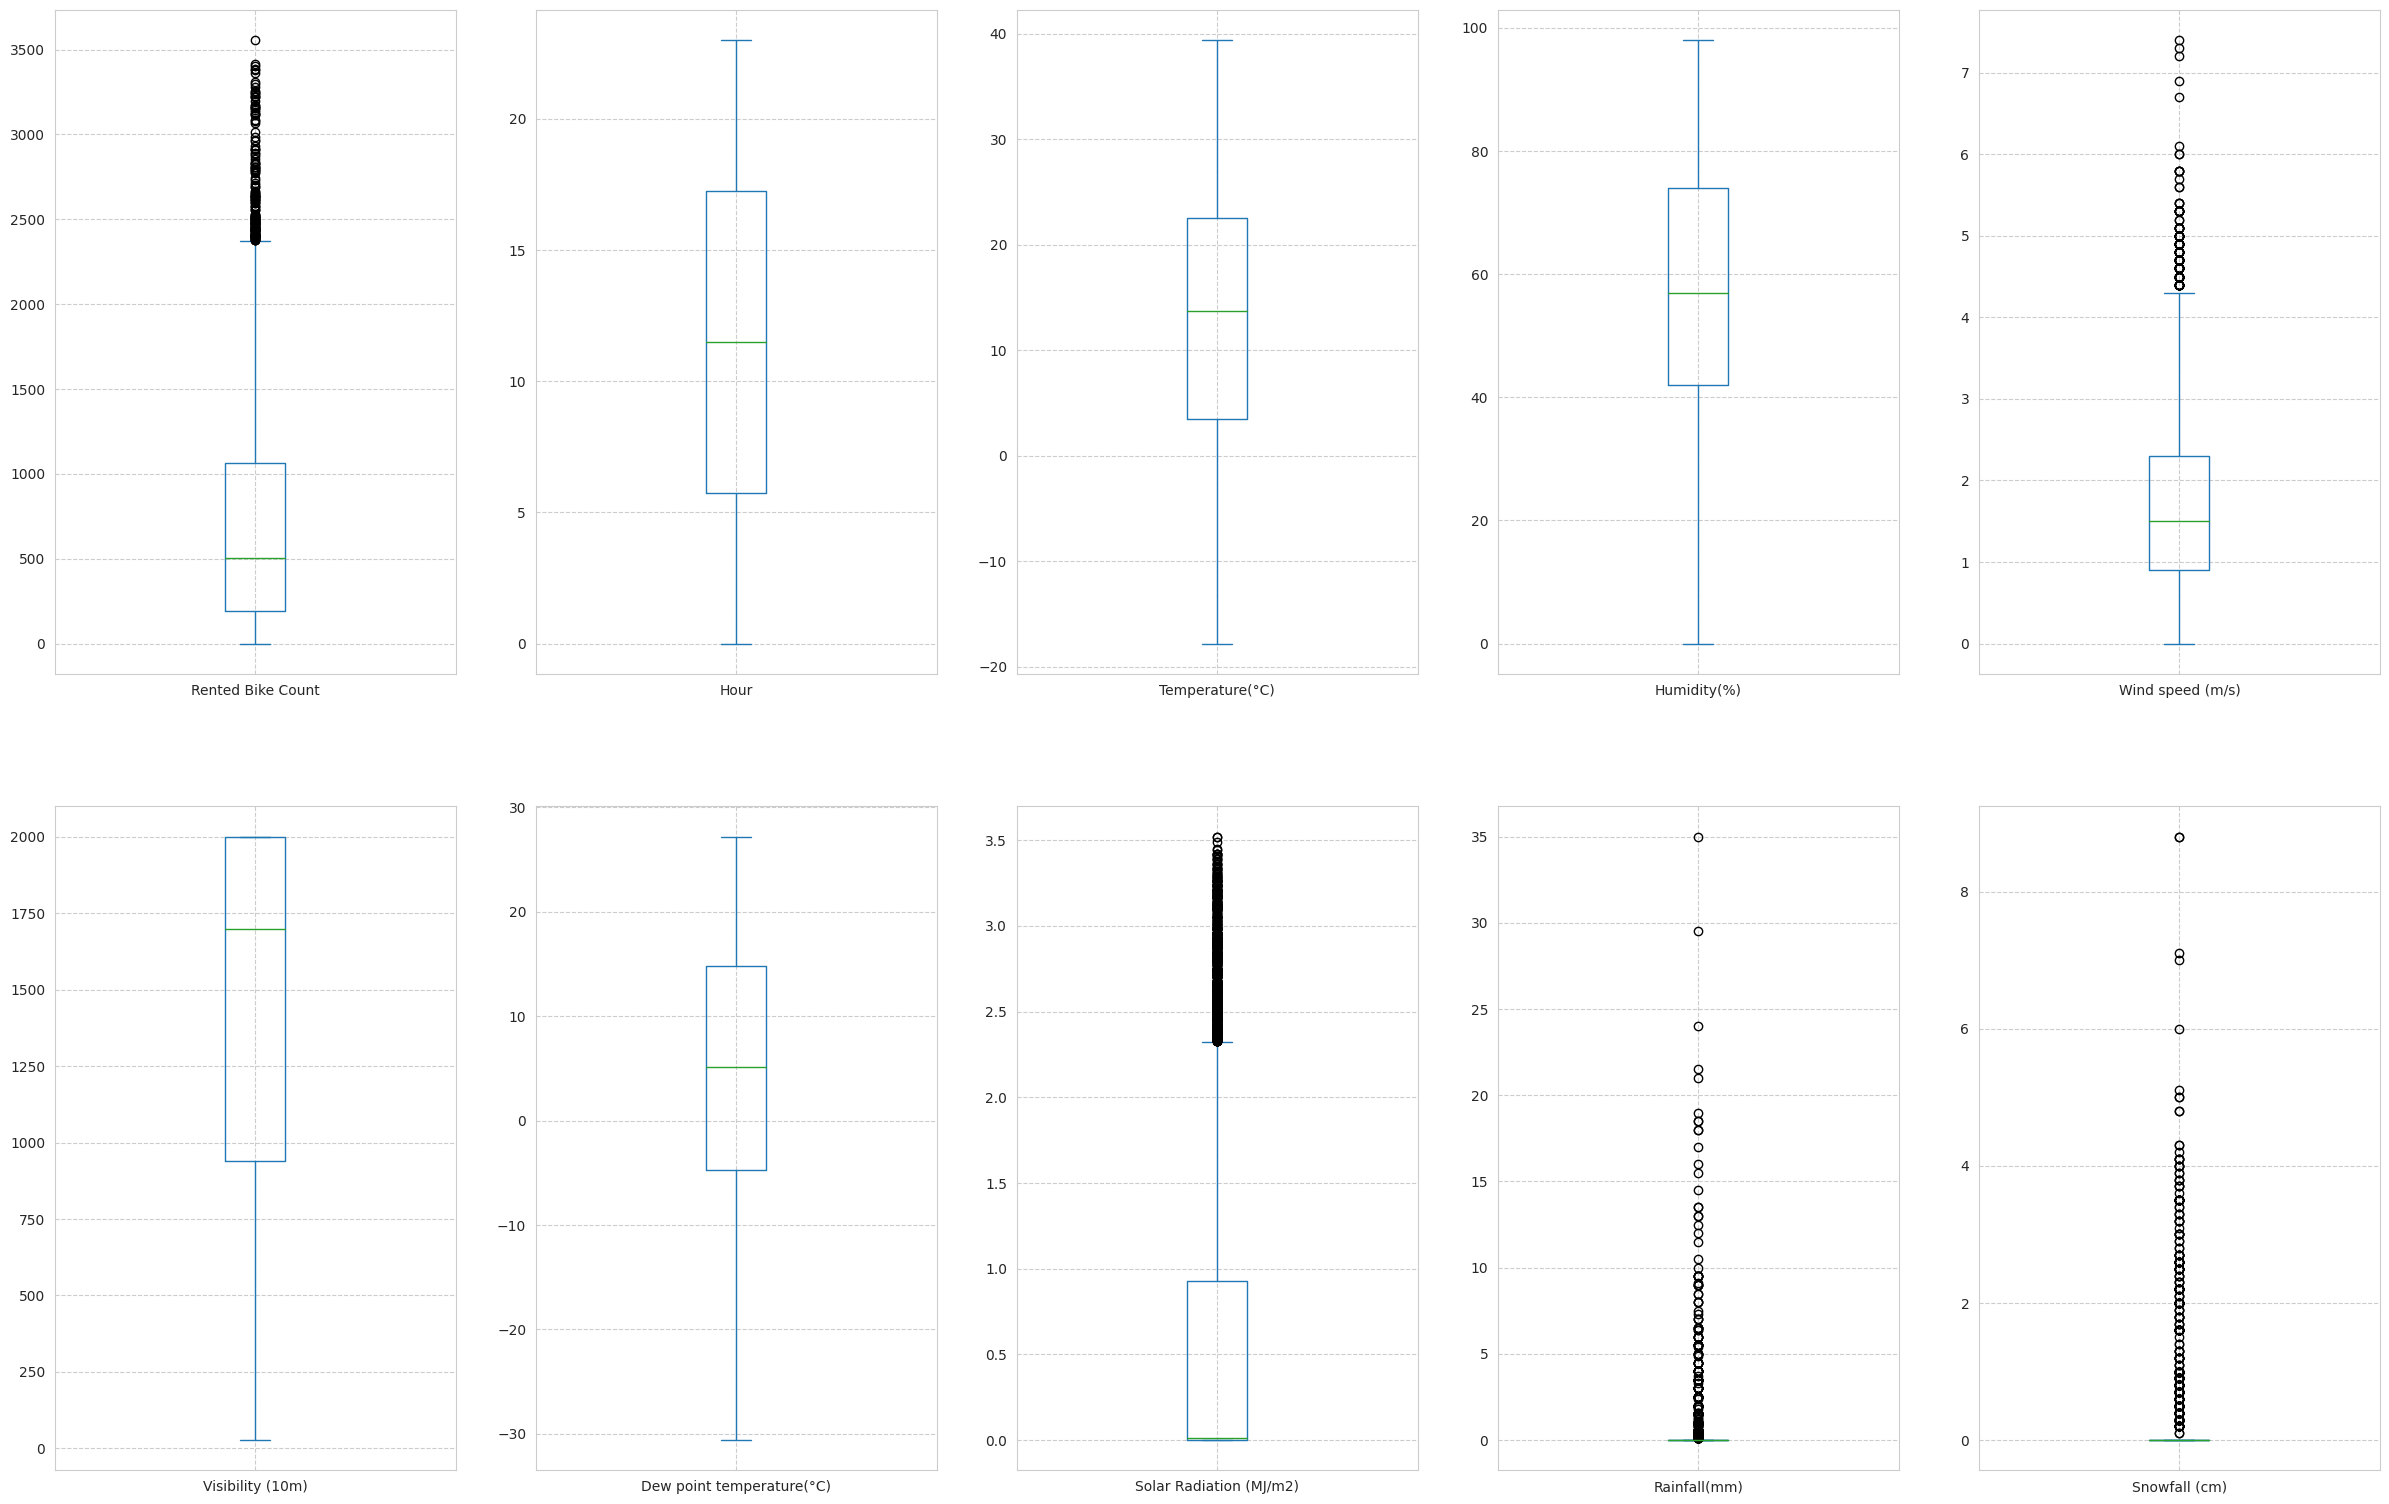

In [43]:
# Plotando boxplots
dataset.plot (kind = 'box', subplots = True, layout = (5,5), figsize = (30,50))
plt.show ()

Podemos observar no conjunto muitos outliers e distribuições assimétricas. Vamos trabalhar no pré-processamento desses dados mais à frente para amenizar essas questões.

Vamos observar agora a correlação entre os atributos.

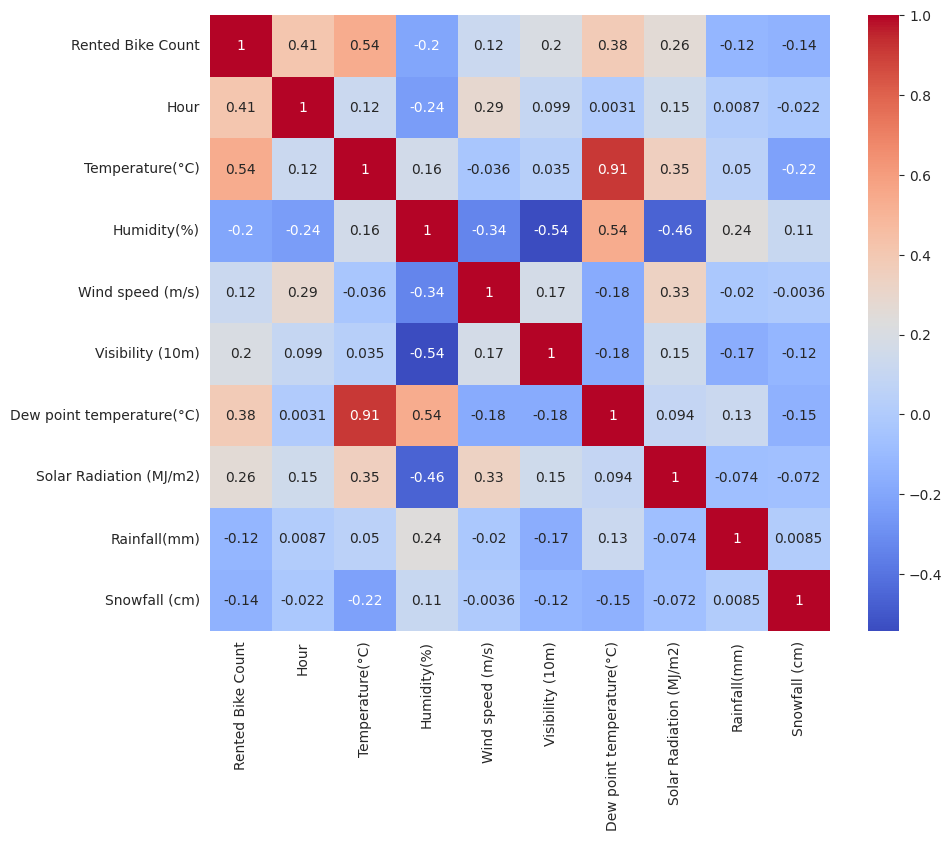

In [44]:
# Plotando o gráfico de correlação de todas as variáveis

numeric_features = dataset.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

Vemos uma correlação muito forte entre temperatura e ponto de orvalho, o que pode impactar negativamente nossa análise.

Vamos, portanto, remover a varíavel "Dew point temperature(°C)" do nosso dataset.

In [45]:
# Removendo Dew point temperature(°C)

dataset.drop(columns=['Dew point temperature(°C)'], inplace=True)

## 4\.3 Hipóteses

Temos 2 hipóteses sobre o uso das bicicletas:
- os típicos horários de rush durante a semana afetam seu uso.
- as condições climáticas típicas das estações do ano afetam seu uso.

Vamos, portanto, criar uma variável de dia da semana e de mês (complementar à estação) para conseguir fazer essas observações.


In [46]:
# Criando a variável "Weekday" usando funções do Pandas

# Transformando a coluna Date do tipo object para date
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y')

# Extraindo meses e dias
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day_name()

# Criando a variável Weekday, com valor 1 para dias de semana e 0 para fins de semana
dataset['Weekday'] = dataset['Day'].apply(lambda x: 0 if x=='Saturday' or x=='Sunday' else 1)

<Figure size 2000x600 with 0 Axes>

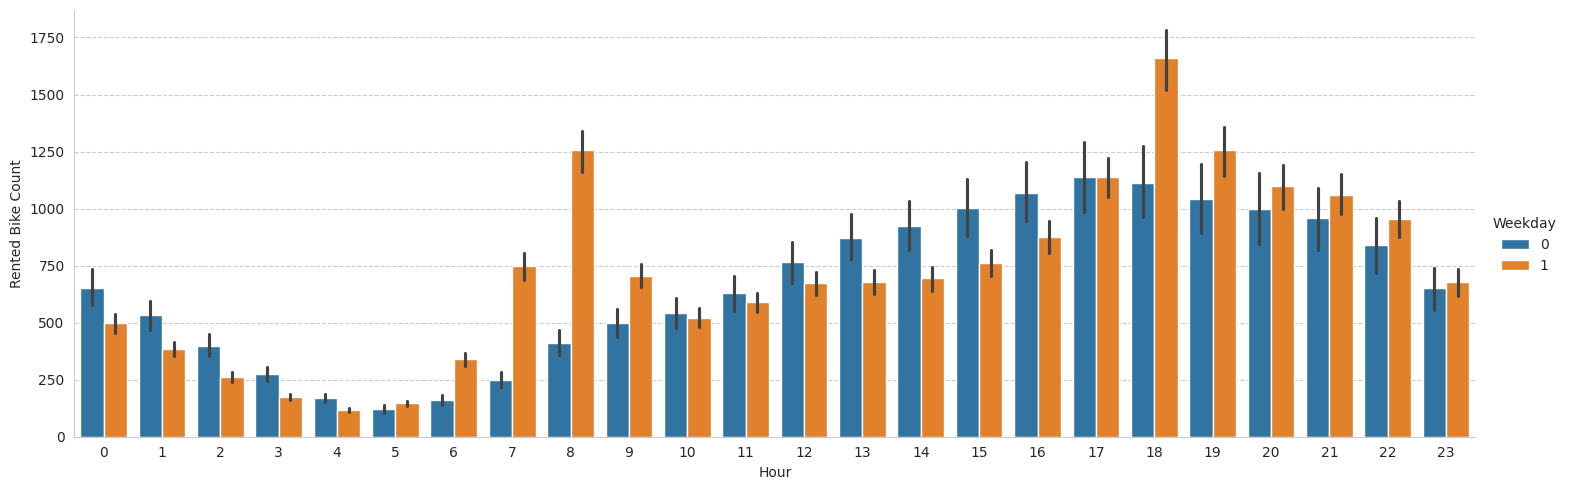

In [47]:
# Plotando um gráfico de barras

plt.figure(figsize=(20, 6))

g = sns.catplot(x='Hour', y='Rented Bike Count', hue='Weekday', data=dataset, kind='bar', height=5, aspect=3)

plt.show()

Vemos que sim, existe uma variação de uso considerável comparando dias de semana e fins de semana.

Existe uma forte demanda no início da manhã e início da noite de segunda à sexta – presumidamente, horários em que as pessoas se locomovem para ir e voltar do trabalho.

À tarde e de madrugada, as bicicletas ficam mais concorridas nos fins de semana, provavelmente para passeios mais despretenciosos.

Podemos analisar que em um ciclo de 24h (que não precisa ser iniciado 00h):
- durante a semana, temos uma distribuição bimodal, com picos nos horários de ida e retorno do trabalho/estudo.
- nos fins de semana, temos uma distribuição normal com pico próximo das 17h.

Isso parece relevante na nossa previsão, então vamos manter essa coluna no dataset.

<Figure size 1000x600 with 0 Axes>

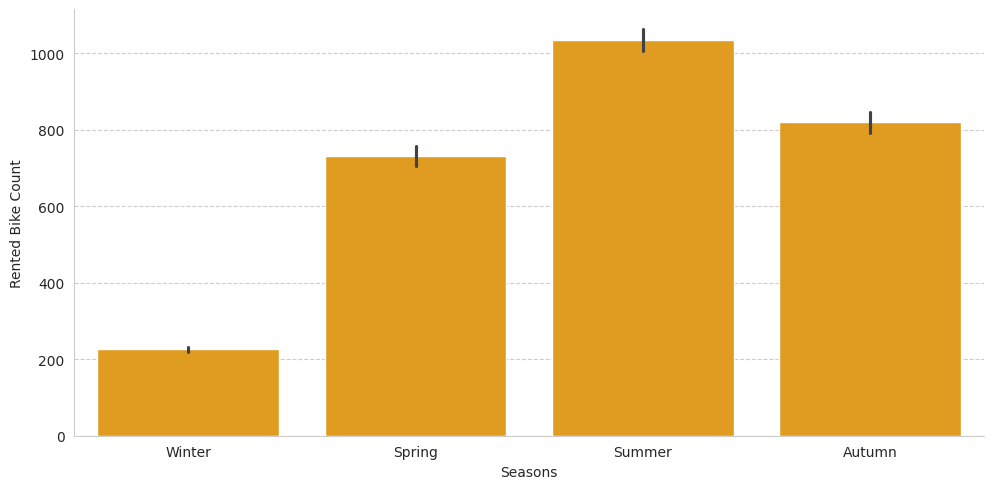

In [48]:
# Plotando um gráfico de barras para as estações

plt.figure(figsize=(10, 6))

g = sns.catplot(x='Seasons', y='Rented Bike Count', data=dataset, kind='bar', height=5, aspect=2, color="orange")

plt.show()

<Figure size 1400x600 with 0 Axes>

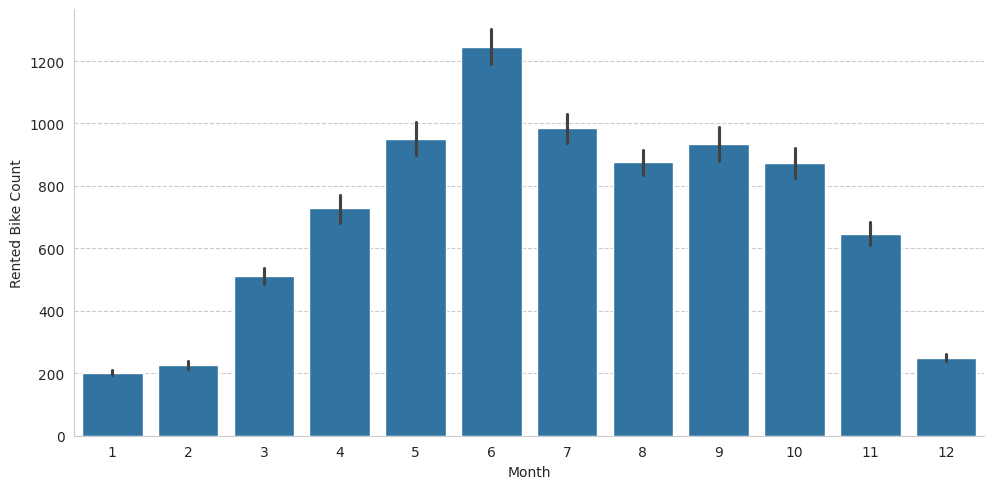

In [49]:
# Plotando um gráfico de barras para os meses

plt.figure(figsize=(14, 6))

g = sns.catplot(x='Month', y='Rented Bike Count', data=dataset, kind='bar', height=5, aspect=2)

plt.show()

A variação de uso entre estações também fica visível. Os meses do ano acompanham essa mesma tendência, mas nos dão uma informação um pouco mais aprofundada.

Vamos, portanto, manter ambas as colunas e remover "Date" e "Day", que não colaboram para nossos modelos.

In [50]:
# Removendo as colunas Date e Day usando o método drop() do Pandas
dataset.drop(['Date','Day'],axis=1 ,inplace=True)

# 5. Pré-processamento das variáveis categóricas

Em seguida, analisaremos as variáveis categóricas do dataset a fim de transformá-las em numéricas.

In [52]:
# Configurações auxiliares

pd.set_option('display.max_columns', None)

### Variável 'Functioning Days'

Vamos tentar entender se a variável Functioning Days acrescenta alguma informação relevante ao dataset para ajudar na previsibilidade da quantidade de bicicletas alugadas.

In [53]:
# Visualizando a distribuição de valores da variável Functioning Days
dataset['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [54]:
not_functioning_days = dataset[dataset['Functioning Day'] == "No"]
not_functioning_days.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
3144,0,0,14.4,82,4.6,1041,0.0,0.0,0.0,Spring,No Holiday,No,4,1
3145,0,1,13.6,81,3.6,886,0.0,0.0,0.0,Spring,No Holiday,No,4,1
3146,0,2,12.7,80,3.9,885,0.0,0.0,0.0,Spring,No Holiday,No,4,1
3147,0,3,11.6,81,3.1,687,0.0,0.0,0.0,Spring,No Holiday,No,4,1
3148,0,4,10.2,83,3.5,554,0.0,0.0,0.0,Spring,No Holiday,No,4,1


Os dados não nos dão nenhum insight de por que o sistema não funciona nesses dias.

Como nosso objetivo aqui é encontrar a quantidade de bicicletas alugadas em dias em que as estações sim vão funcionar, dados sobre os dias em que elas estavam fechadas e sobre se elas estavam abertas não nos ajudam na análise.

Vamos remover essas instâncias e a variável.

In [55]:
dataset=dataset[dataset['Functioning Day'] == "Yes"]

In [56]:
# Conferindo novamente a distribuição de valores da variável Functioning Days
dataset['Functioning Day'].value_counts()

Functioning Day
Yes    8465
Name: count, dtype: int64

In [57]:
# Removendo a variável Functioning Days
dataset.drop(['Functioning Day'],axis=1 ,inplace=True)

### Variável 'Seasons'

In [58]:
# Visualizando a distribuição de valores da variável Seasons
dataset['Seasons'].value_counts()

Seasons
Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: count, dtype: int64

In [59]:
# Usando o método de dummy encoding da biblioteca Pandas para transformar a variável Seasons
dataset=pd.get_dummies(dataset,columns=['Seasons'], dtype=int)

Transformamos a coluna Seasons em 4 novas colunas: Seasons_Autumn, Seasons_Spring, Seasons_Summer, Seasons_Winter.

### Variável 'Holiday'

In [60]:
# Visualizando a distribuição de valores da variável Holiday
dataset['Holiday'].value_counts()

Holiday
No Holiday    8057
Holiday        408
Name: count, dtype: int64

In [61]:
# Transformando a coluna Holiday em booleana
dataset['Holiday'] = dataset['Holiday'].map({"No Holiday":0, "Holiday":1})

Transformamos a coluna Holiday em uma variável binária.

### Transformações e observações finais

In [62]:
# Refazendo a ordem das colunas
desired_column_order = ['Hour',
                        'Month',
                        'Temperature(°C)',
                        'Humidity(%)',
                        'Wind speed (m/s)',
                        'Visibility (10m)',
                        'Solar Radiation (MJ/m2)',
                        'Rainfall(mm)',
                        'Snowfall (cm)',
                        'Holiday',
                        'Seasons_Autumn',
                        'Seasons_Spring',
                        'Seasons_Summer',
                        'Seasons_Winter',
                        'Weekday',
                        'Rented Bike Count']

dataset = dataset.reindex(columns=desired_column_order)

In [63]:
# Conferindo nossas alterações
dataset.head()

,Hour,Month,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday,Rented Bike Count
0,0,12,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,1,1,254
1,1,12,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,0,1,1,204
2,2,12,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,0,1,1,173
3,3,12,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,0,1,1,107
4,4,12,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,1,78


In [64]:
# Conferindo o novo resumo
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     8465 non-null   int64  
 1   Month                    8465 non-null   int32  
 2   Temperature(°C)          8465 non-null   float64
 3   Humidity(%)              8465 non-null   int64  
 4   Wind speed (m/s)         8465 non-null   float64
 5   Visibility (10m)         8465 non-null   int64  
 6   Solar Radiation (MJ/m2)  8465 non-null   float64
 7   Rainfall(mm)             8465 non-null   float64
 8   Snowfall (cm)            8465 non-null   float64
 9   Holiday                  8465 non-null   int64  
 10  Seasons_Autumn           8465 non-null   int64  
 11  Seasons_Spring           8465 non-null   int64  
 12  Seasons_Summer           8465 non-null   int64  
 13  Seasons_Winter           8465 non-null   int64  
 14  Weekday                  8465

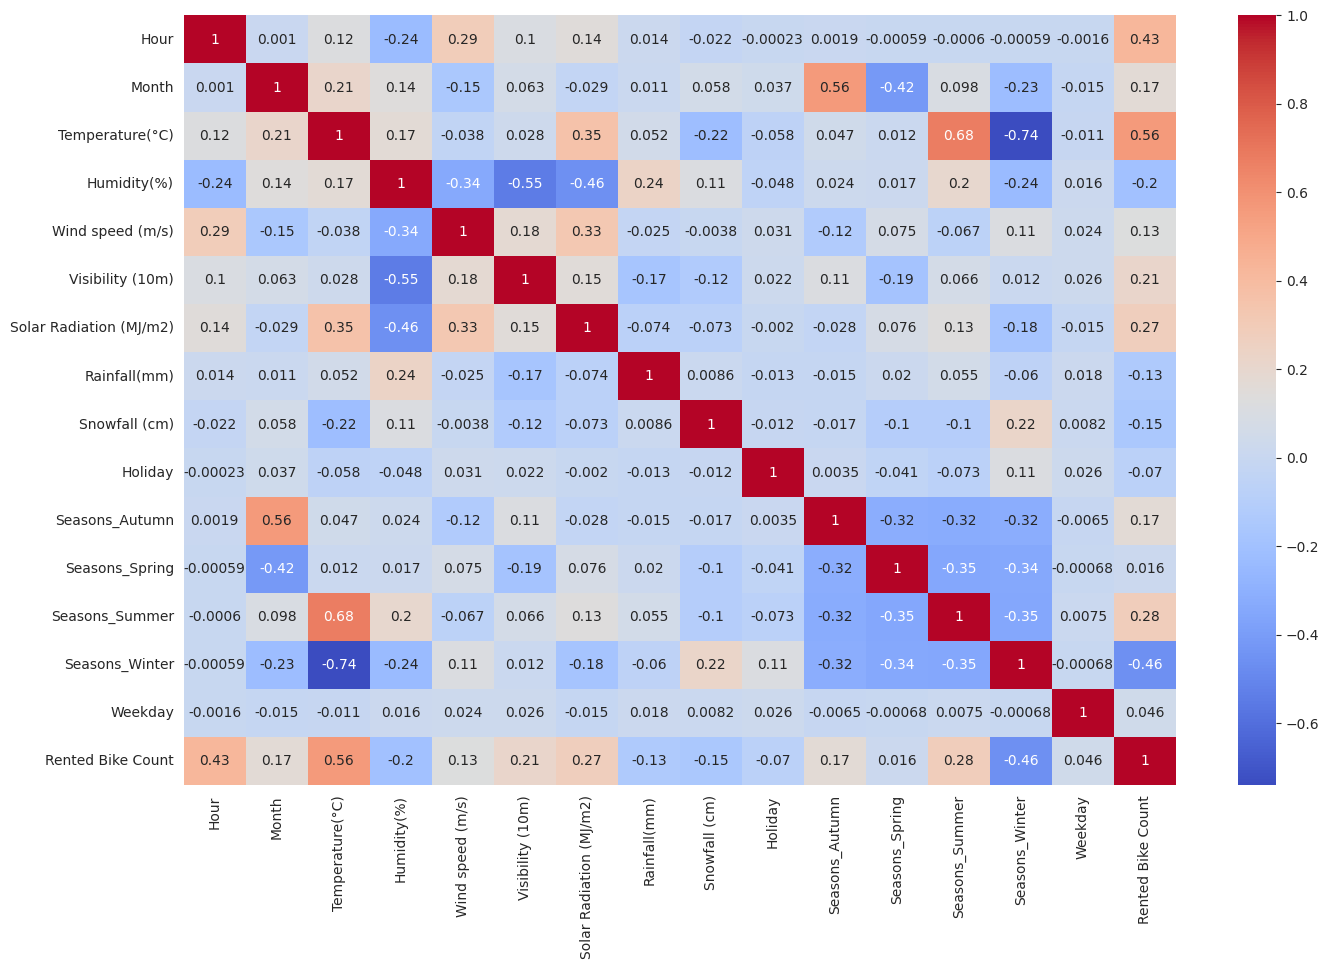

In [65]:
# Verificando a correlação agora com todas as variáveis transformadas
corr_matrix = dataset.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [66]:
# Fazendo uma cópia do dataset antes de aplicar mais transformações
df = dataset.copy()

# 6. Feature selection

Com todas as variáveis bem definidas, o próximo passo vai ser realizar a feature selection, para identificar os atributos mais relevantes para o nosso modelo.

In [67]:
# Preparação dos dados
# Separando os atributos da variável target

array = dataset.values
X = array[:,0:15] # atributos
y = array[:,15] # classe (target)

In [68]:
# Usando o método SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=8)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:15])

# Exibe as pontuações de cada atributos e os 10 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)

# Applying SelectKBest function
scores = fit.scores_ # get scores
indices = np.argsort(scores)[::-1] # sort the indices of scores

# Selecting the indices of top k features
selected_features = indices[:8]
print(f"\nAtributos selecionados: {dataset.columns[indices[:8]]}")

# Transform X to the selected features
X_selected = X[:, selected_features]

# Splitting the data into train and test sets for selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=7)


Número original de atributos: 15

Número reduzido de atributos: 8

Atributos Originais: Index(['Hour', 'Month', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Weekday'],
      dtype='object')

Scores dos Atributos Originais: [1.868e+03 2.434e+02 3.922e+03 3.599e+02 1.344e+02 3.995e+02 6.862e+02
 1.424e+02 1.991e+02 4.176e+01 2.378e+02 2.055e+00 7.312e+02 2.258e+03
 1.823e+01]

Atributos selecionados: Index(['Temperature(°C)', 'Seasons_Winter', 'Hour', 'Seasons_Summer',
       'Solar Radiation (MJ/m2)', 'Visibility (10m)', 'Humidity(%)', 'Month'],
      dtype='object')


Salvamos uma visão dos dados com apenas os atributos selecionados e a utilizaremos mais à frente.

# 7. Criação e avaliação de modelos iniciais

Entendendo o caráter exploratório do trabalho, de praticar o máximos de técnicas possíveis, vamos fazer uma primeira rodada de criação e avaliação das opções de modelos que temos para o nosso problema.

Ainda não incluiremos otimização de hiperparâmetros, nem feature selection. O objetivo aqui é encontrar os modelos que parecem melhor responder aos nossos dados, e, a partir deles, otimizaremos.

## 7\.1 Separando em treino e teste

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6772, 15), (1693, 15), (6772,), (1693,))

## 7\.2 Aplicando normalização

Para os primeiros testes, vamos usar o MinMaxScaler. Posteriormente, nos pipelines, testaremos também o StandardScaler.

In [71]:
# MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7\.3 Primeiros modelos de regressão

Vamos avaliar os modelos utilizando três das métricas mais indicadas e comuns para problemas de regressão: MSE (erro quadrático médio), RMSE (raiz do erro quadrático médio) e R2 (coeficiente de determinação).

Enquanto o MSE e o RMSE nos fornecem informações sobre a magnitude do erro, o R2 nos permite entender o quanto a variável target é explicada pelo nosso modelo, o quanto o modelo captura a variância dos dados inputados.

In [72]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Definindo scoring
scoring='neg_mean_squared_error'

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Métricas de avaliação
scoring = {'r2': 'r2', 'Neg MSE': 'neg_mean_squared_error'}

# Avaliando cada modelo
for name, model in models:
    scores = cross_validate(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)

    # Calculando RMSE
    rmse = np.sqrt(abs(scores['test_Neg MSE'].mean()))

    print(f"{name}:\n MSE: {-scores['test_Neg MSE'].mean():.2f}, Std of MSE: {scores['test_Neg MSE'].std():.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R2: {scores['test_r2'].mean():.2f}, Std of R2: {scores['test_r2'].std():.2f}\n")


LR:
 MSE: 188893.79, Std of MSE: 8321.49
 RMSE: 434.62
 R2: 0.54, Std of R2: 0.02

Ridge:
 MSE: 188885.60, Std of MSE: 8542.25
 RMSE: 434.61
 R2: 0.54, Std of R2: 0.02

Lasso:
 MSE: 190066.37, Std of MSE: 9104.15
 RMSE: 435.97
 R2: 0.54, Std of R2: 0.02

KNN:
 MSE: 71276.05, Std of MSE: 7432.67
 RMSE: 266.98
 R2: 0.83, Std of R2: 0.02

CART:
 MSE: 55536.63, Std of MSE: 8189.76
 RMSE: 235.66
 R2: 0.87, Std of R2: 0.02

SVM:
 MSE: 308300.87, Std of MSE: 19258.84
 RMSE: 555.25
 R2: 0.25, Std of R2: 0.02



À primeira vista, vemos que os modelos que melhor parecem corresponder ao nosso problema são as Árvores de Regressão e o K Nearest Neighbours.

Técnicas de regressão linear não performam tão bem e SVM muito menos.

Vamos seguir portanto com os modelos de Árvores de Regressão e KNN, e com técnicas de regressão apenas em ensemble, para descobrir se conseguimos melhorar seus resultados.

## 7\.3 Ensembles

In [73]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Definindo scoring
scoring='neg_mean_squared_error'

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
names = []

# Definindo os parâmetros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()

# Criando os modelos para o VotingRegressor
bases = []
model1 = LinearRegression()
bases.append(('LR', model1))
model2 = DecisionTreeRegressor()
bases.append(('CART', model2))
model3 = SVR()
bases.append(('SVM', model3))

# Preparando os modelos e adicionando-os em uma lista
models.append(('Voting', VotingRegressor(bases)))
models.append(('Bagging', BaggingRegressor(base)))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Extra Trees', ExtraTreesRegressor()))
models.append(('Ada Boost', AdaBoostRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

# Métricas de avaliação
scoring = {'r2': 'r2', 'Neg MSE': 'neg_mean_squared_error'}

# Avaliando cada modelo
for name, model in models:
    scores = cross_validate(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)

    # Calculando RMSE
    rmse = np.sqrt(abs(scores['test_Neg MSE'].mean()))

    print(f"{name}:\n MSE: {-scores['test_Neg MSE'].mean():.2f}, Std of MSE: {scores['test_Neg MSE'].std():.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R2: {scores['test_r2'].mean():.2f}, Std of R2: {scores['test_r2'].std():.2f}\n")


Voting:
 MSE: 115150.79, Std of MSE: 6864.42
 RMSE: 339.34
 R2: 0.72, Std of R2: 0.01

Bagging:
 MSE: 32699.90, Std of MSE: 4683.67
 RMSE: 180.83
 R2: 0.92, Std of R2: 0.01

Random Forest:
 MSE: 29481.25, Std of MSE: 4013.82
 RMSE: 171.70
 R2: 0.93, Std of R2: 0.01

Extra Trees:
 MSE: 25256.42, Std of MSE: 3835.82
 RMSE: 158.92
 R2: 0.94, Std of R2: 0.01

Ada Boost:
 MSE: 150723.33, Std of MSE: 5948.89
 RMSE: 388.23
 R2: 0.63, Std of R2: 0.01

Gradient Boosting:
 MSE: 53553.57, Std of MSE: 4235.77
 RMSE: 231.42
 R2: 0.87, Std of R2: 0.01



Os ensembles com os melhores resultados foram Bagging, Random Forest, Extra Trees e Gradient Boosting.

# 8. Pipelines

Vamos repetir o treinamento dos algoritmos mais bem-sucedidos nos testes iniciais usando um pipeline, a fim de garantir que não há vazamento de dados.

Esses algoritmos são:
- KNN
- Árvore de Regressão
- Bagging
- Random Forest
- Extra Trees
- Gradient Boosting

Aproveitamos as facilidades dessa técnica para incluir no teste desses modelos, além da opções normalizadas, também nossos dados sem nenhum tipo de tratamento e padronizados.

In [74]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
names = []

scoring = 'neg_mean_squared_error'

# Criando os elementos do pipeline

# Definindo os parâmetros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 3

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsRegressor())
cart = ('CART', DecisionTreeRegressor())
bagging = ('Bag', BaggingRegressor(base))
random_forest = ('RF', RandomForestRegressor())
extra_trees = ('ET', ExtraTreesRegressor())
gradient_boosting = ('GB', GradientBoostingRegressor())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Métricas de avaliação
scoring = {'r2': 'r2', 'Neg MSE': 'neg_mean_squared_error'}

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

# Executando os pipelines
for name, model in pipelines:
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

    # Calculando RMSE
    rmse = np.sqrt(abs(scores['test_Neg MSE'].mean()))

    print(f"{name}:\n MSE: {-scores['test_Neg MSE'].mean():.2f}, Std of MSE: {scores['test_Neg MSE'].std():.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R2: {scores['test_r2'].mean():.2f}, Std of R2: {scores['test_r2'].std():.2f}\n")

KNN-orig:
 MSE: 166292.79, Std of MSE: 10449.44
 RMSE: 407.79
 R2: 0.60, Std of R2: 0.02

CART-orig:
 MSE: 53347.67, Std of MSE: 8516.86
 RMSE: 230.97
 R2: 0.87, Std of R2: 0.02

Bag-orig:
 MSE: 33465.78, Std of MSE: 3800.63
 RMSE: 182.94
 R2: 0.92, Std of R2: 0.01

RF-orig:
 MSE: 29358.98, Std of MSE: 4038.67
 RMSE: 171.34
 R2: 0.93, Std of R2: 0.01

ET-orig:
 MSE: 25217.90, Std of MSE: 3779.02
 RMSE: 158.80
 R2: 0.94, Std of R2: 0.01

GB-orig:
 MSE: 53559.49, Std of MSE: 4244.58
 RMSE: 231.43
 R2: 0.87, Std of R2: 0.01

KNN-padr:
 MSE: 82112.93, Std of MSE: 7845.03
 RMSE: 286.55
 R2: 0.80, Std of R2: 0.01

CART-padr:
 MSE: 54423.88, Std of MSE: 8385.97
 RMSE: 233.29
 R2: 0.87, Std of R2: 0.02

Bag-padr:
 MSE: 32586.66, Std of MSE: 4107.54
 RMSE: 180.52
 R2: 0.92, Std of R2: 0.01

RF-padr:
 MSE: 29455.58, Std of MSE: 4157.36
 RMSE: 171.63
 R2: 0.93, Std of R2: 0.01

ET-padr:
 MSE: 25302.72, Std of MSE: 3597.44
 RMSE: 159.07
 R2: 0.94, Std of R2: 0.01

GB-padr:
 MSE: 53557.15, Std of M

Os algoritmos que apresentaram melhores resultados foram, portanto, ensembles do tipo bagging com árvores de regressão, incluindo o Random Forest e Extra Trees. Eles tiveram resultados próximos.

O Extra Trees foi o mais bem-sucedido, com R2 de 0.94, nos três casos: com os dados originais, normalizados ou padronizados.

Os dados originais apresentaram, por uma margem muito pequena, o melhor RMSE: 158.80.

# 9. Otimização de hiperparâmetros

A fim de experimentar a otimização de hiperparâmetros com o GridSearchCV, vamos buscar otimizar os hiperparâmetros do algoritmo ExtraTrees para entender se conseguimos melhorar seu desempenho. Usaremos como métrica de avaliação para o GridSearchCV o RMSE.

Vamos incluir aqui também opções de treinamento para com as selected features que encontramos preciamente com o SelectKBest.

In [75]:
# Tuning do ExtraTrees

np.random.seed(7) # definindo uma semente global para este bloco

scoring = 'neg_root_mean_squared_error'

param_grid = {
    'ET__n_estimators': [50, 100, 200],
    'ET__max_depth': [None, 10, 20, 50]
}

pipelines = []

# Definindo os componentes do pipeline
et = ('ET', ExtraTreesRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('et-orig', Pipeline(steps=[et])))
pipelines.append(('et-padr', Pipeline(steps=[standard_scaler, et])))
pipelines.append(('et-norm', Pipeline(steps=[min_max_scaler, et])))

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print(f"Best {name}")
    print(" All columns: %f using %s" % (grid.best_score_, grid.best_params_))

    # Usando apenas as selected features
    grid_selected = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_selected.fit(X_train_selected, y_train)
    # Imprime a melhor configuração para features selecionadas
    print(" Selected features: %f using %s \n" % (grid_selected.best_score_, grid_selected.best_params_))

Best et-orig
 All columns: -157.602172 using {'ET__max_depth': 50, 'ET__n_estimators': 200}
 Selected features: -241.034146 using {'ET__max_depth': 50, 'ET__n_estimators': 200} 

Best et-padr
 All columns: -157.687884 using {'ET__max_depth': 20, 'ET__n_estimators': 200}
 Selected features: -239.742721 using {'ET__max_depth': 20, 'ET__n_estimators': 200} 

Best et-norm
 All columns: -157.750757 using {'ET__max_depth': None, 'ET__n_estimators': 200}
 Selected features: -240.246319 using {'ET__max_depth': 20, 'ET__n_estimators': 200} 



A otimização nos revela resultados piores com dataset reduzido para apenas as features selecionadas.

Para o dataset com todas as colunas, o melhor número de estimadores para todas as opções é 200, enquanto o máximo de profundidade é de 50 para o conjunto sem transformação e 20 para os conjuntos com o intervalo dos dados trabalhados.

Ainda sim, as diferenças dos resultados são muito pequenas, com o dataset sem transformação apresentando os melhores resultados.

Vamos, portanto, finalizar o treinamento do modelo com esses dados e observar como ele se comporta.

# 10. Finalizando o modelo

Vamos usar os hiperparâmetros que encontramos para finalizar o modelo escolhido ExtraTrees, treinando-o em todo o conjunto de dados de treinamento e ver seu resultado.


In [76]:
np.random.seed(7) # definindo uma semente global para este bloco

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
model = ExtraTreesRegressor(n_estimators = 200, max_depth = 50)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Model R-Square : {r2*100:.2f}% - {r2}")
print(f"Model RMSE : {rmse} \n")


Model R-Square : 93.34% - 0.9334120832205746
Model RMSE : 166.0241765423318 



O modelo apresentou um resultado absoluto bastante promissor, mas marginalmente pior do que os resultados de treinamento.

Também ficou abaixo dos resultados de treinamento de opções do ExtraTrees com os dados padronizados ou normalizados.

Isso pode se dever a um leve overfitting, pelo modelo não estar se generalizando bem a novos dados.

Vamos testar treinar com as opções normalizadas e padronizadas.

In [77]:
np.random.seed(7) # definindo uma semente global para este bloco

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = ExtraTreesRegressor(n_estimators = 200, max_depth=None)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Model R-Square : {r2*100:.2f}% - {r2}")
print(f"Model RMSE : {rmse} \n")


Model R-Square : 93.35% - 0.9335415874775299
Model RMSE : 165.86265097677392 



In [78]:
np.random.seed(7) # definindo uma semente global para este bloco

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = ExtraTreesRegressor(n_estimators = 200, max_depth=20)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Model R-Square : {r2*100:.2f}% - {r2}")
print(f"Model RMSE : {rmse} \n")


Model R-Square : 93.38% - 0.9338222176621216
Model RMSE : 165.51209108923248 



Os dados trabalhados apresentaram resultados infimamente melhores, apesar de ainda piores do que os resultados esperados no treinamento.

Como o resultado do nosso melhor modelo finalizado – ExtraTrees com dados padronizados – ainda é melhor do que outros algoritmos testados, vamos mantê-lo.

Para possíveis próximos passos de investigação, caberia entender se esse desvio se refere mesmo à overfitting dos dados, testando outras alternativas de pré-processamento e hiperparametrização.

Como último passo, vamos preparar o modelo para uso em produção, treinando-o com todo o dataset.

In [79]:
# Preparação do modelo de ExtraTrees com dados padronizados com TODO o dataset

model = ExtraTreesRegressor(n_estimators = 200, max_depth = 20)
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)


ExtraTreesRegressor(max_depth=20, n_estimators=200)

# Conclusão



A partir da análise exploratória dos dados, encontramos correlações fortes entre a temperatura, as estações e os horários com os alugéis de bicicletas em Seoul.

Os alugéis caem durante o inverno (Dezembro a Fevereiro), muito provavelmente devido ao frio.

Os picos de demanda durante a semana são nas horas de ida e retorno do trabalho/estudo, de 8h às 9h da manhã e 18h às 19h da noite (distribuição bimodal). Nos fins de semana, o uso varia uniformemente em torno do pico de uso às 17h (distribuição normal).

Encontramos uma correlação positiva muito forte entre Temperatura e Ponto de Orvalho. Removemos essa e outras colunas menos relevantes para a análise do dataset, além de transformar variáveis categóricas em numéricas.

Na etapa de treinamento e avaliação dos modelos, vimos como técnicas de regressão linear e KNN não se encaixaram bem com nossos dados, e como opções de árvores de regressão apresentaram resultados melhores. Ensembles do tipo bagging foram os mais bem-sucedidos.

A partir de múltiplos testes, com o uso de pipelines e a otimização de hiperparêmtros, observamos o modelo de ExtraTrees com padronização de dados sendo o mais adequado para fazer previsões da utilização das bicicletas.

Obtivemos um R2 de 93% e um RMSE de 165.5.